In [3]:
%matplotlib inline
from sympy import init_session
from sympy import init_printing
from sympy import *
init_printing() 
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
im = cv2.imread('00.jpg')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
gray = thresify(gray,2,2)
_,cnts, _ = cv2.findContours(
        gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
idx =0 
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
#     cv2.imwrite(str(idx) + '.jpg', roi)
    cv2.rectangle(gray,(x,y),(x+w,y+h),(200,0,0),5)
    plt.imshow(gray)
    plt.show()
    print(f'-     <{x,y},{x+w,y+h}>')
    
#cv2.destroyAllWindows()

NameError: name 'thresify' is not defined

In [4]:
def thresify(gray, dk, ek):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

    _, thresh = cv2.threshold(
        blackhat, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    thresh = cv2.GaussianBlur(thresh, (1, 1), cv2.BORDER_DEFAULT)

    thresh = cv2.dilate(thresh, np.ones((dk, dk)))

    thresh = cv2.erode(thresh, np.ones((ek, ek)))

    return thresh


In [10]:
from sympy.parsing.latex import *
def getRes(im):
    print('Parsing image...')
    print('Result is: ')
    s =    parse_latex("""
    \sum
    \limits
            ^ {
                100
            }
            _ {
                i
                =
                0
            }
        (
        2
        x
        +
        3
        i
        )


    """.replace('\\limits',''))
    return s

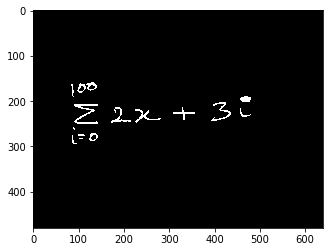

Parsing image...
Result is: 


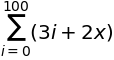

In [11]:
plt.imshow(thresify(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY),2,2),cmap='gray')
plt.show()
s = getRes(im)
s

In [14]:
str(s.evalf())

'Sum(3*i + 2*x, (i, 0, 100))'

In [6]:
s = sympify('((x^2+y^2-1)^3)-x^2*y^3')

In [7]:
s

In [8]:
s

In [9]:
from sympy.parsing.sympy_parser import parse_expr
from sympy import plot_implicit
ezplot = lambda exper: plot_implicit(sympify(exper))
ezplot('x+2+
       +y')0

SyntaxError: EOL while scanning string literal (<ipython-input-9-5529772d5c33>, line 4)

In [10]:
exp

exp

In [11]:
!./GetTeX.x  /dev/stdin <<<'ss221'|awk '/^\$/ {flag=!flag; next} flag {print}'

/bin/sh: 1: Syntax error: redirection unexpected


In [12]:
from subprocess import Popen,PIPE
out = subprocess.call(['/home/kayshu/documents/GetTeX.x','eg_symbols.dat'])

NameError: name 'subprocess' is not defined

In [13]:
p = Popen(['/home/kayshu/documents/GetTeX.x','eg_symbols.dat'],stdout=PIPE)

In [14]:
import shlex
from tqdm import tqdm
from subprocess import Popen, PIPE

def get_exitcode_stdout_stderr(cmd,input_):
    """
    Execute the external command and get its exitcode, stdout and stderr.
    """
    args = shlex.split(cmd)

    proc = Popen(args,stdin=PIPE, stdout=PIPE, stderr=PIPE,universal_newlines=True)
    out, err = proc.communicate(input=input_)
    exitcode = proc.returncode
    #
    return exitcode, out, err

In [85]:
for i in tqdm(range(1)):
    cmd = "/home/kayshu/documents/bin/GetTeX.x /dev/stdin "  # arbitrary external command, e.g. "python mytest.py"
    exitcode, out, err = get_exitcode_stdout_stderr(cmd,"""
Number of Symbols: 13
\sum     <(90, 207),(144, 251)>
2     <(172, 213),(217, 248)>
x     <(225, 219),(282, 248)>
-     <(101, 281),(112, 285)>
0     <(127, 274),(141, 287)>
i     <(86, 275),(98, 296)>
-     <(99, 273),(114, 278)>
i     <(456, 215),(481, 235)>
+     <(309, 214),(358, 242)>
3     <(393, 202),(437, 245)>
0     <(101, 167),(114, 180)>
0     <(122, 164),(138, 176)>
1     <(84, 162),(91, 191)>
(     <(150,207),(171,255)>
)     <(485,208),(510,260)>

""")
    out = re.findall( '\$(.*?)\$', out, re.DOTALL)[0]
    out = out.replace('\n','')
    out = out.replace(' ','')
    out = out.replace('\limits','')

100%|██████████| 1/1 [00:00<00:00, 26.80it/s]


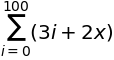

In [94]:
suma =parse_latex(out)
suma

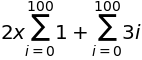

In [96]:
simplify_logic(suma)

In [97]:
suma.doit()

In [33]:
pat = pat.replace('\n','')

In [34]:
pat = pat.replace(' ','')

In [35]:
pat

'\\sum\\limits^{n}_{a(n)=k=1^{(-1)}}n=k_{=!}'

In [36]:
print(pat)

\sum\limits^{n}_{a(n)=k=1^{(-1)}}n=k_{=!}
